In [1]:
## imports
import pandas as pd
import numpy as np
import seaborn as sns

## import the plotnine package
## make sure it's installed
## if not installed, can use
## ! pip install plotnine
# import plotnine
# from plotnine import *

import matplotlib.pyplot as plt


# A few plot types

## Load DC crime data

In [5]:
## load data on 2020 crimes in DC
df = dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")

## Plot type one: bar plot

**Goal**: bar plot where x axis is what shift it is; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator)

In [8]:
## step one: create the summary we want to plot
C = count_byshift = pd.DataFrame(df.groupby('SHIFT')['OBJECTID'].nunique()).reset_index()
count_byshift


,SHIFT,OBJECTID
0,DAY,10094
1,EVENING,12324
2,MIDNIGHT,5515


#### Explore the data: Make a simple graph and see if you need it

([<matplotlib.axis.XTick at 0x7fbc00bd2c40>,
 [Text(0, 0, 'DAY'), Text(1, 0, 'EVENING'), Text(2, 0, 'MIDNIGHT')])

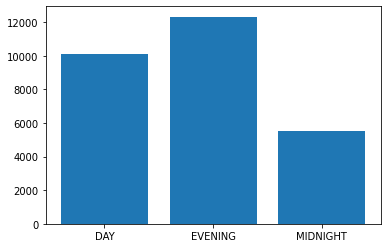

In [45]:
plt.bar(C.index, C.OBJECTID)
plt.xticks(C.index, C.SHIFT)

#### Make the graph look pretty

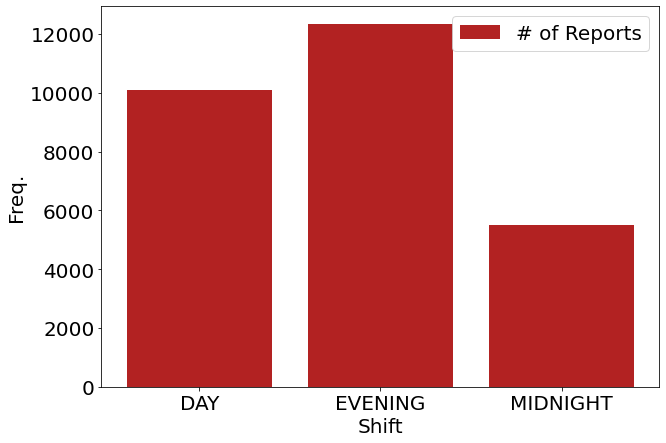

In [53]:
plt.figure(figsize=(10,7)) # Define the size of the graph

plt.bar(C.index, C.OBJECTID, label = "# of Reports", 
        color="firebrick") # Define the figure object

plt.xticks(C.index, C.SHIFT, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Shift", fontsize=20)
plt.ylabel("Freq.", fontsize=20)

plt.legend(fontsize=20)

plt.savefig("barplot.png", bbox_inches="tight")

#### Try it yourself with METHOD
Create a bar chart on the METHOD column.
Named colors: https://matplotlib.org/stable/gallery/color/named_colors.html

# Histograms and Densities

(array([  38.,  150.,  292.,  515.,  867.,  776., 1261., 2622., 4522.,
        2440., 2251., 3052., 3071., 1829.,  907.,  789.,  849.,  853.,
         649.,  200.]),
 array([-77.11364471, -77.10346988, -77.09329506, -77.08312024,
        -77.07294541, -77.06277059, -77.05259577, -77.04242094,
        -77.03224612, -77.0220713 , -77.01189647, -77.00172165,
        -76.99154683, -76.981372  , -76.97119718, -76.96102236,
        -76.95084753, -76.94067271, -76.93049789, -76.92032306,
        -76.91014824]),
 <BarContainer object of 20 artists>)

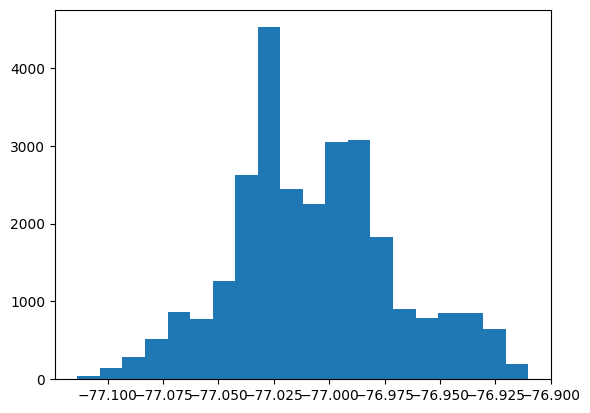

In [10]:
plt.hist( df.X, bins=20 )

<AxesSubplot: xlabel='X', ylabel='Density'>

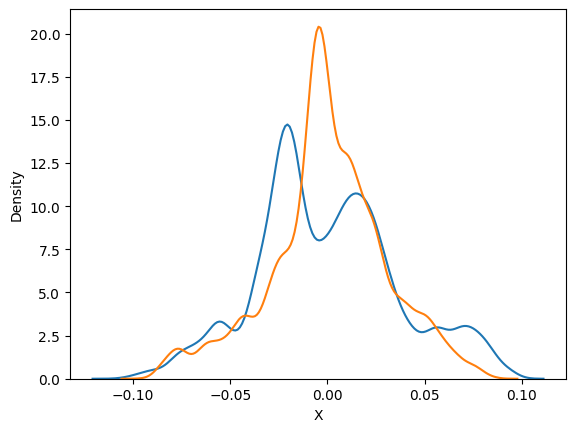

In [18]:
sns.kdeplot( df.X - df.X.mean())
sns.kdeplot( df.Y - df.Y.mean())

#### Your Turn: Add labels (X and Y), plot the legend, and change the color of your density
- What are the differences in distribution you observe?

## Two dimensional density plots

<AxesSubplot: xlabel='X', ylabel='Y'>

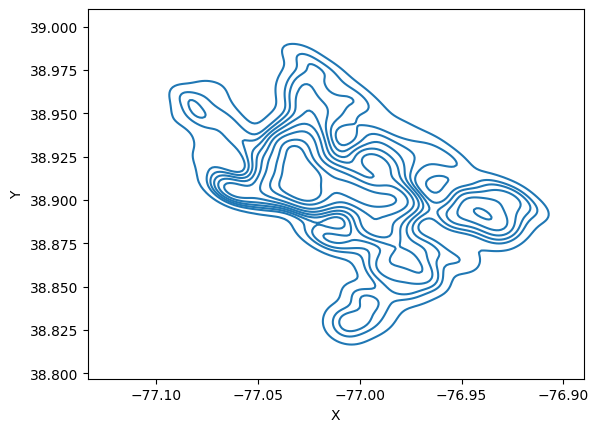

In [20]:
sns.kdeplot(x = df.X, y = df.Y)

#### Your turn: Seperately plot the densities for WARDS 1, 2, and 3

- Should take six lines of code. Hint: Do it for 1 first.

# Line Plots
**Goal**: bar plot where x axis is month; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator); want line graph to be able to see trends over time in count of reported crimes

In [28]:
df['report_month'] = pd.to_datetime(df.REPORT_DAT).dt.month
df[["REPORT_DAT", "report_month"]].sample(n = 3)

,REPORT_DAT,report_month
2577,2020/03/06 02:39:22+00,3
11459,2020/06/17 20:55:38+00,6
11234,2020/04/04 21:27:56+00,4


In [29]:
### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
C = count_bymonth = df.groupby('report_month')['OBJECTID'].nunique().reset_index()
C

,report_month,OBJECTID
0,1,2950
1,2,2540
2,3,2201
3,4,1652
4,5,1834
5,6,2276
6,7,2134
7,8,2433
8,9,2571
9,10,2563


(0.0, 4000.0)

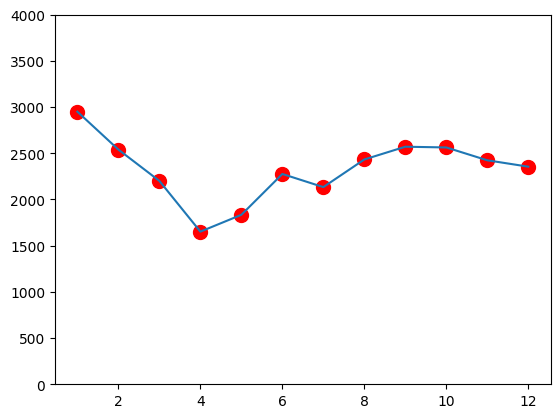

In [30]:
plt.plot(C.report_month, C.OBJECTID)

plt.scatter(C.report_month, C.OBJECTID, 
            s=100, c="red")

plt.ylim(0,4000)

#### Your Turn: Now add the appropriate x and y labels following the same logic as the bar graph

# Read onward if you have experience with R & ggplot

### Other ways to create bars

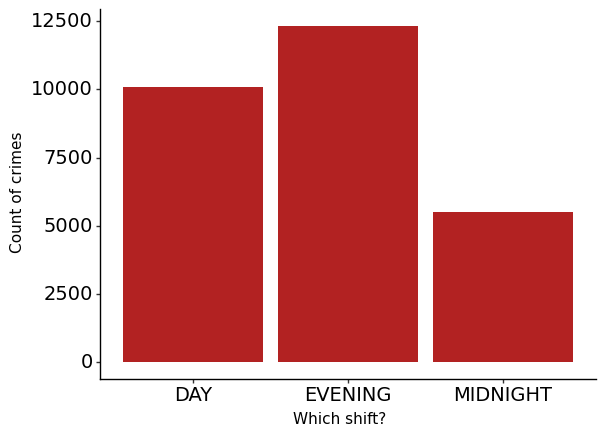

<ggplot: (8790731287113)>

In [4]:

## one way: plot and display in notebook
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) + # base layer with data and x and y axis 
            geom_bar(stat = "identity", fill = "firebrick") + # telling it to expect a bar chart; identity
             # arg just means to use the y value 
            theme_classic() + # aesthetics
            xlab("Which shift?") + # custom label for x axis
            ylab("Count of crimes") + # custom label for y axis
            theme(axis_text = element_text(size = 14, color = "black"))) # make font bigger


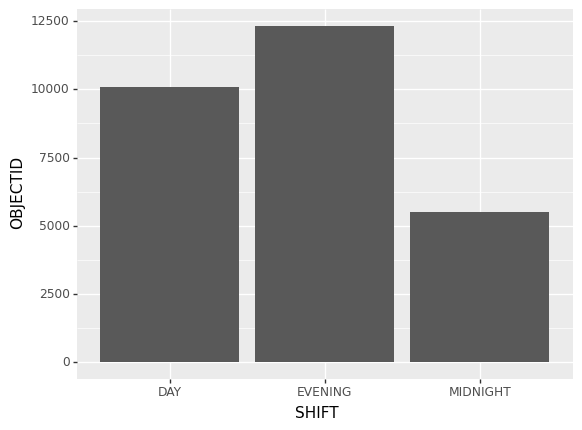

<ggplot: (8790731605815)>

In [5]:

## another way: save to png- right now,
## it's writing to same path our df is stored in; 
plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)


## what happens if we don't specify theme or color of bars? diff aesthetics
## also doesnt give us informative x and y labels (for pset please give 
## informative labels)
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity"))

## Plot type two: line graph

In [6]:
## group by month and find unique reports
### first, extract month from report_dat (just 
### with the noncleaned version)

dc_crim_2020['report_month'] = pd.to_datetime(dc_crim_2020.REPORT_DAT,
                                             errors = "coerce").dt.month
### double check this worked
dc_crim_2020[["REPORT_DAT", "report_month"]].sample(n = 3)

### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
count_bymonth = pd.DataFrame(dc_crim_2020.groupby('report_month')['OBJECTID'].nunique()).reset_index()
count_bymonth


,REPORT_DAT,report_month
26209,2020/08/30 23:43:30+00,8
11179,2020/03/23 02:47:15+00,3
13388,2020/01/28 04:21:18+00,1


,report_month,OBJECTID
0,1,2948
1,2,2537
2,3,2200
3,4,1652
4,5,1831
5,6,2275
6,7,2132
7,8,2431
8,9,2572
9,10,2562


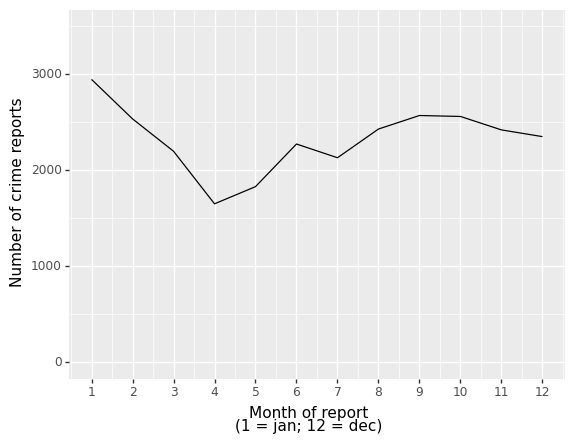

<ggplot: (8790733814212)>

In [7]:

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line() +
            ylim(0, 3500) +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)))

## Making more complex: adding facets

What if we want to create the above but visualize separately for each ward?

Can group by two variables (see lecture slide) and add a line to facet_wrap

,report_month,WARD,OBJECTID
0,1,1,369
1,1,2,654
2,1,3,222
3,1,4,313
4,1,5,456


,report_month,WARD,OBJECTID
91,12,4,253
92,12,5,380
93,12,6,305
94,12,7,343
95,12,8,278


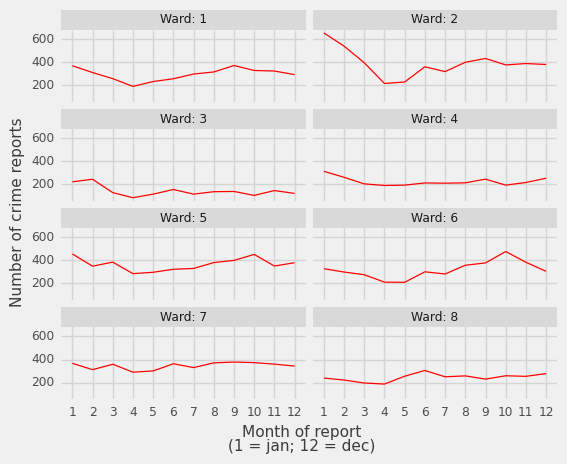

<ggplot: (8790732038873)>

In [8]:
### add ward as grouping var
count_bymonth_byw = pd.DataFrame(dc_crim_2020.groupby(['report_month',
                                                   'WARD'])['OBJECTID'].nunique()).reset_index()
count_bymonth_byw.head()
count_bymonth_byw.tail()

## make the facetting var prettier 
## by noting "Ward" before the
count_bymonth_byw['WARD_name'] = 'Ward: ' + count_bymonth_byw.WARD.astype(str)

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line(color = "red") +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            facet_wrap('WARD_name', ncol = 2) + # ADDITIONAL LINE 
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() # using 538 theme 
            ) 

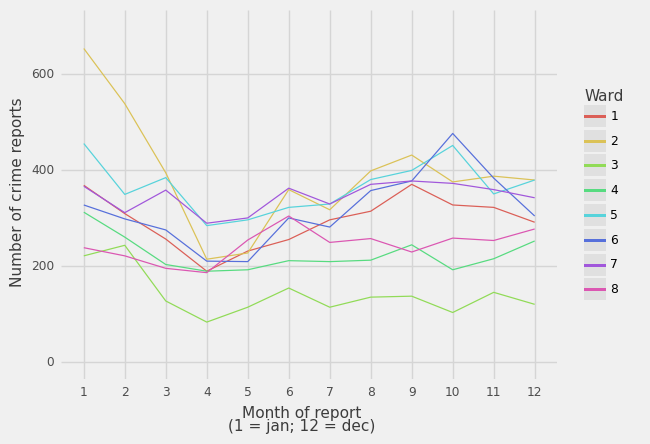

<ggplot: (8790731282695)>

In [12]:
### rather than geom_bar()
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID', group = 'factor(WARD)', color = 'factor(WARD)')) +
            geom_line() +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() + # using 538 theme +
             labs(color = "Ward") +
             ylim(0, 700)
            ) 